# Automobile modeling

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
#Setting up the Dataframe


Tweets = pd.read_excel('/Users/calebdimenstein/Desktop/Twitter/Updated_Sources.xlsx',sheet_name = 0)
AutomobileStock = pd.read_csv('/Users/calebdimenstein/Desktop/Company Stocks/Automobiles Stock Changes.csv')

AutomobileStock['Date'] = pd.to_datetime(AutomobileStock['Date'],format = '%m/%d/%y').dt.strftime('%m/%d/%y')
Tweets['Date'] = pd.to_datetime(Tweets['Date'],format = '%Y-%m-%d').dt.strftime('%m/%d/%y')
Tweets['Count'] = 1
Tweets = Tweets.loc[Tweets['Date'] > '05/21/20']

Tweets_news = (Tweets.loc[(Tweets['screenName'] == 'nytimes') | (Tweets['screenName'] == 'latimes') | (Tweets['screenName'] == 'WSJ')
                          | (Tweets['screenName'] == 'CNN') |(Tweets['screenName'] == 'MSNBC') | (Tweets['screenName'] == 'BostonGlobe') |
                          (Tweets['screenName'] == 'BBCWorld') | (Tweets['screenName'] == 'NewYorker') | (Tweets['screenName'] == 'TheAtlantic')
                          | (Tweets['screenName'] == 'politico') | (Tweets['screenName'] == 'cnnbrk')])
Tweets_news = Tweets_news[~Tweets_news.tweets.str.contains("RT",regex = False)]
min_max_scaler = MinMaxScaler()
Tweets_news[['likes']] = min_max_scaler.fit_transform(Tweets_news[['likes']])



DateAgg = Tweets_news.set_index('Date').groupby(level=0).agg({'Count': np.sum,'compound':['mean'],'likes':['sum'],'retweets':['sum']})
dateAgg = DateAgg.columns=['_'.join(col) for col in DateAgg.columns.values]
DateCount = pd.DataFrame(DateAgg).reset_index()
#Merging the dataframes
DateAgg = pd.merge(DateCount[['Date','Count_sum','compound_mean','likes_sum','retweets_sum']],AutomobileStock,how = 'right', on = 'Date')
DateAgg = DateAgg.dropna()
DateAgg = DateAgg.rename(columns={'Count_sum':'count','compound_mean':'mean'})
print(DateAgg)

         Date  count      mean  likes_sum  retweets_sum  Volkswagon  \
128  05/22/20  139.0 -0.024511   0.629077       16739.0   -0.013346   
129  05/26/20  139.0 -0.035561   0.390084        9099.0   -0.002530   
130  05/27/20  170.0 -0.026994   0.810858       19513.0   -0.000596   
131  05/28/20  184.0 -0.033250   0.516358        9547.0   -0.006715   
132  05/29/20  120.0 -0.017108   0.535266       17406.0   -0.002528   
..        ...    ...       ...        ...           ...         ...   
244  11/05/20   10.0 -0.030500   0.186036        3594.0    0.010018   
245  11/06/20   34.0  0.012206   0.195304        3835.0    0.003523   
246  11/09/20  134.0  0.052634   2.265058       23173.0   -0.025831   
247  11/10/20  130.0  0.000554   0.946198       10796.0    0.010913   
248  11/11/20   46.0  0.029717   0.467300        6986.0    0.000539   

     General Motors  Daimlyer      Ford     Honda    Toyota  SAIC Motor  \
128       -0.000385 -0.009259 -0.005282 -0.002113 -0.004235   -0.003798 

# 2X5 Stock compared to Number of Tweets

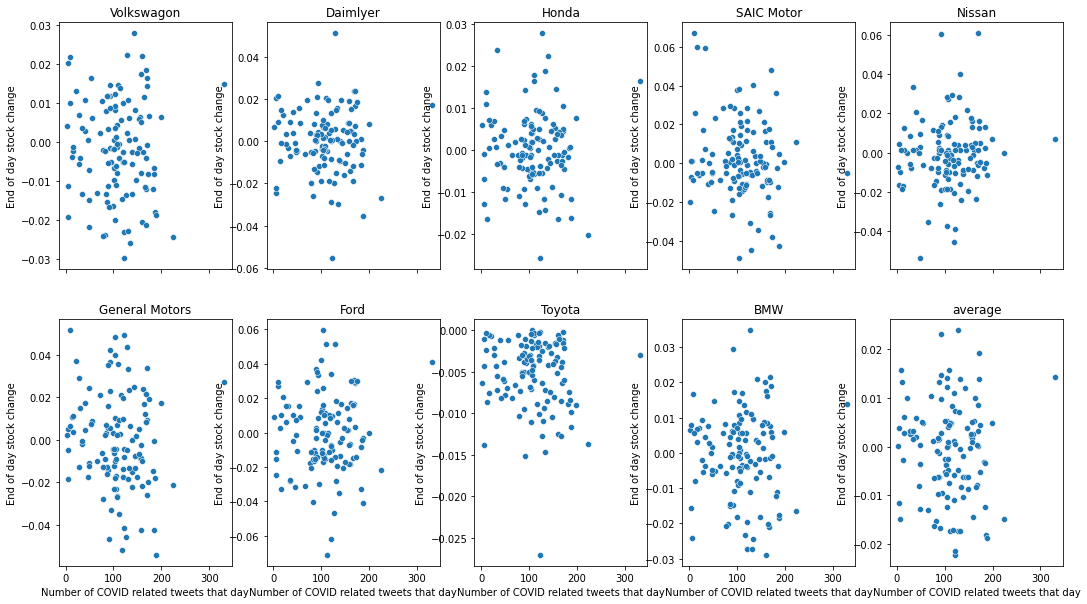

In [45]:
fig, axes = plt.subplots(2,5, sharex=True, sharey=False, figsize=(18,10))
AutomobileArr = ['Volkswagon','General Motors','Daimlyer','Ford','Honda','Toyota','SAIC Motor', 'BMW', 'Nissan','average']
columns = [0,1,2,3,4]
rows = [0,1]
count = 0
for column in columns:
    for row in rows:
        sns.scatterplot(ax=axes[row, column], data = DateAgg, x = 'count', y = AutomobileArr[count])
        axes[row,column].set_title(AutomobileArr[count])
        axes[row,column].set(xlabel = "Number of COVID related tweets that day", ylabel = 'End of day stock change')
        count = count + 1

# 2X5 Stock compared to positivity/negativity of Tweets that day

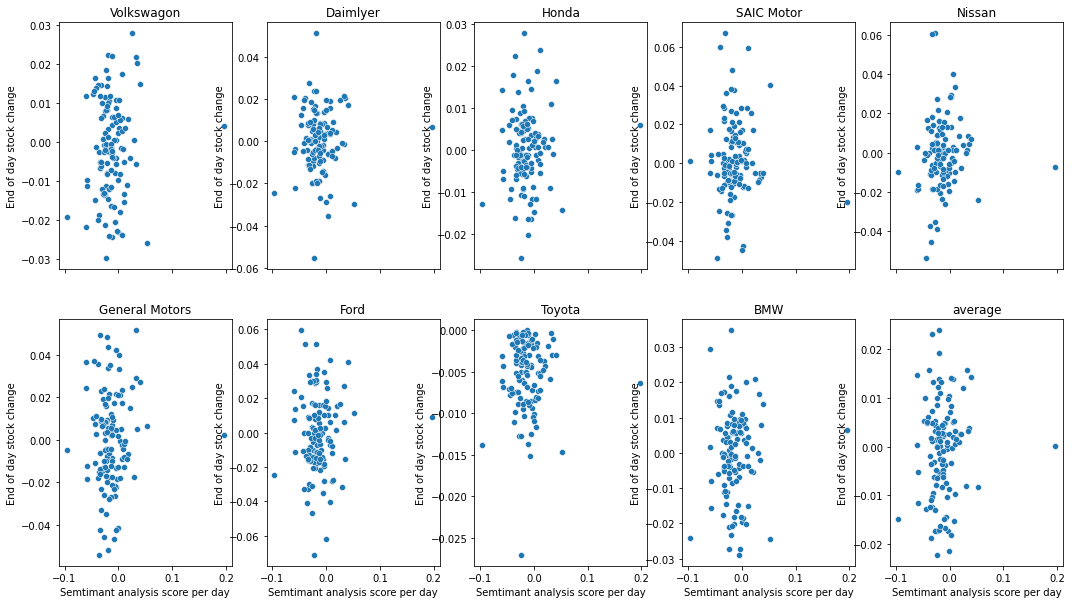

In [46]:
figSent, axesSent = plt.subplots(2,5, sharex=True, sharey=False, figsize=(18,10))
AutomobileArr = ['Volkswagon','General Motors','Daimlyer','Ford','Honda','Toyota','SAIC Motor', 'BMW', 'Nissan','average']
columns = [0,1,2,3,4]
rows = [0,1]
count = 0
for column in columns:
    for row in rows:
        sns.scatterplot(ax=axesSent[row, column], data = DateAgg, x = 'mean', y = AutomobileArr[count])
        axesSent[row,column].set_title(AutomobileArr[count])
        axesSent[row,column].set(xlabel = "Semtimant analysis score per day", ylabel = 'End of day stock change')
        count = count + 1

# Electric company modeling

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


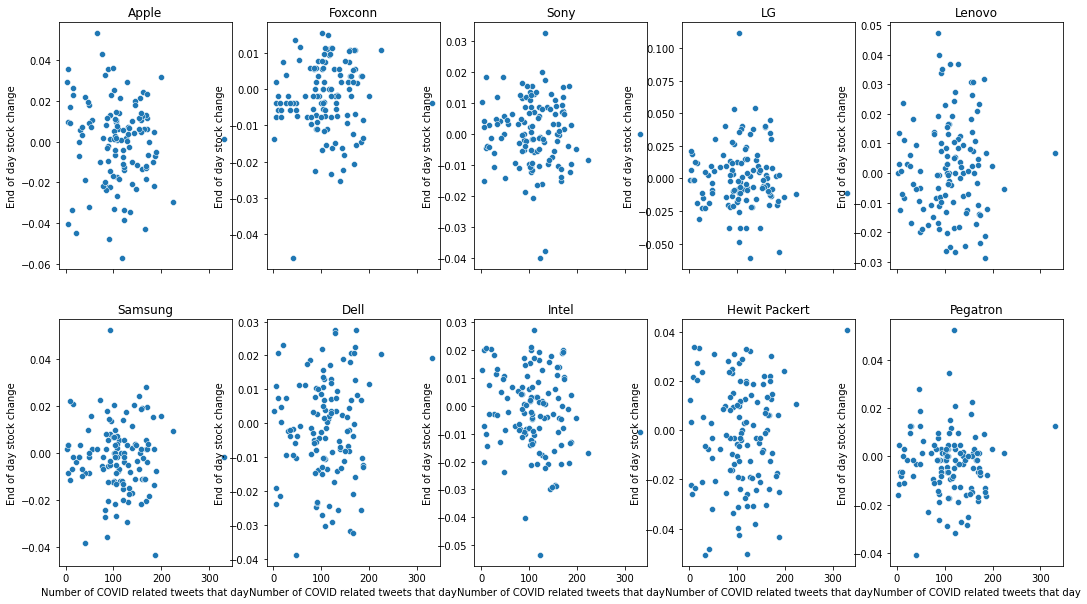

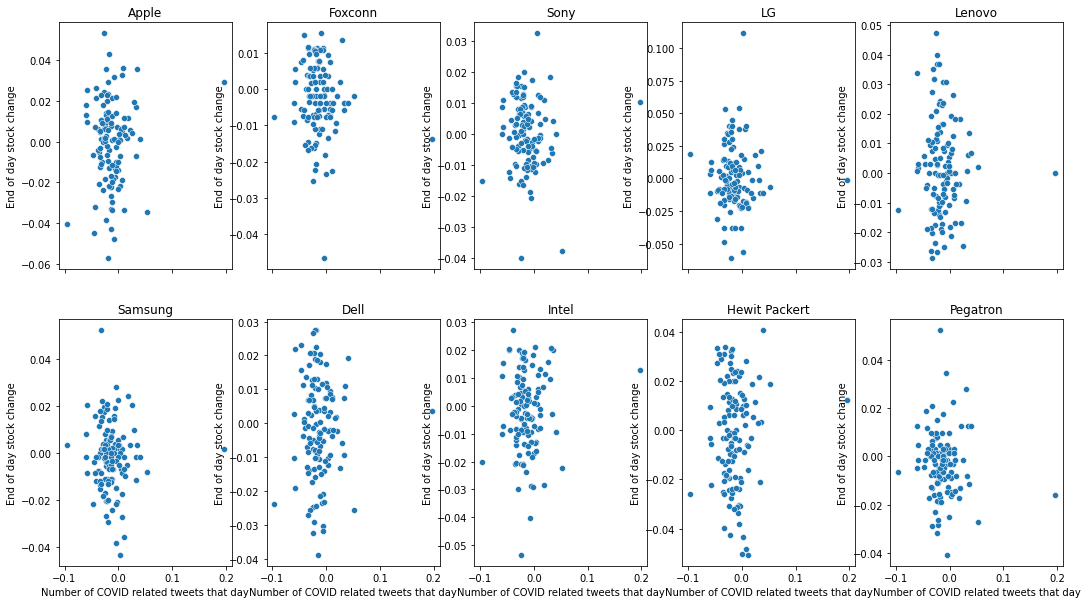

In [120]:
ElectronicStocks = pd.read_csv('/Users/calebdimenstein/Desktop/Company Stocks/Electronics Stock Changes.csv')
ElectronicStocks['Date'] = pd.to_datetime(ElectronicStocks['Date'],format = '%m/%d/%y').dt.strftime('%m/%d/%y')

ElectronicMerge = pd.merge(DateCount[['Date','Count_sum','compound_mean','likes_sum','retweets_sum']],ElectronicStocks,how = 'right', on = 'Date')
ElectronicMerge = ElectronicMerge.dropna()
ElectronicMerge = ElectronicMerge.rename(columns={'Count_sum':'count','compound_mean':'mean','likes_sum':'likes','retweets_sum':'retweets'})

figElec, axesElec = plt.subplots(2,5, sharex=True, sharey=False, figsize=(18,10))
ElectricArr = ['Apple','Samsung','Foxconn','Dell','Sony','Intel','LG', 'Hewit Packert', 'Lenovo','Pegatron']
columns = [0,1,2,3,4]
rows = [0,1]
count = 0
for column in columns:
    for row in rows:
        sns.scatterplot(ax=axesElec[row, column], data = ElectronicMerge, x = 'count', y = ElectricArr[count])
        axesElec[row,column].set_title(ElectricArr[count])
        axesElec[row,column].set(xlabel = "Number of COVID related tweets that day", ylabel = 'End of day stock change')
        count = count + 1

count = 0
figElecSent, axesElecSent = plt.subplots(2,5, sharex=True, sharey=False, figsize=(18,10))
for column in columns:
    for row in rows:
        sns.scatterplot(ax=axesElecSent[row, column], data = ElectronicMerge, x = 'mean', y = ElectricArr[count])
        axesElecSent[row,column].set_title(ElectricArr[count])
        axesElecSent[row,column].set(xlabel = "Number of COVID related tweets that day", ylabel = 'End of day stock change')
        count = count + 1
        

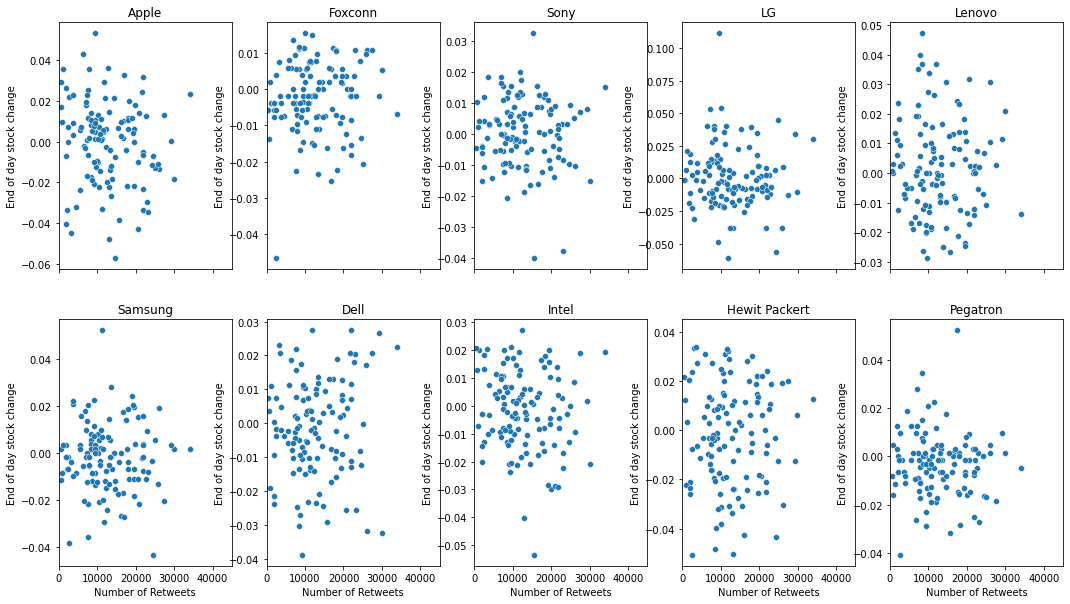

In [48]:
figElecRetweet, axesElecRetweet = plt.subplots(2,5, sharex=True, sharey=False, figsize=(18,10))

count = 0
for column in columns:
    for row in rows:
        sns.scatterplot(ax=axesElecRetweet[row, column], data = ElectronicMerge, x = 'retweets', y = ElectricArr[count])
        axesElecRetweet[row,column].set_title(ElectricArr[count])
        axesElecRetweet[row,column].set(xlabel = "Number of Retweets", ylabel = 'End of day stock change')
        plt.xlim(0,45000)
        count = count + 1

# Covid Cases compared to Number of Tweets

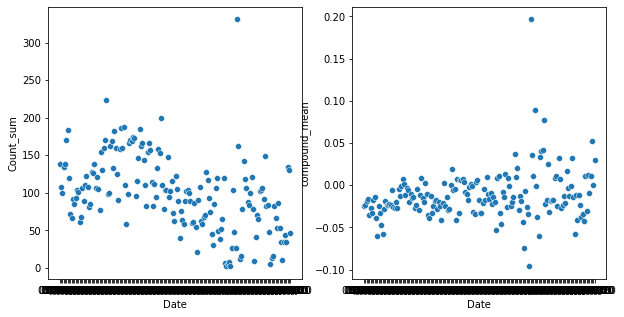

In [3]:
CovidCases = pd.read_excel('/Users/calebdimenstein/Desktop/Twitter/Cases.xlsx',sheet_name = 0)
CovidCases = CovidCases.rename(columns={'Date_reported':'Date'})
CovidCases['Date'] = pd.to_datetime(CovidCases['Date'],format = '%m/%d/%y').dt.strftime('%m/%d/%y')
CovidCases = CovidCases.loc[(CovidCases[' Country_code'] == 'US') & (CovidCases['Date'] > '05/21/20')]

casesMerged = Tweets_news.set_index('Date').groupby(level=0).agg({'Count': np.sum,'compound':['mean']})
test = casesMerged.columns=['_'.join(col) for col in casesMerged.columns.values]
casesMergedFinal = pd.DataFrame(casesMerged).reset_index

casesMerged = pd.merge(casesMerged,CovidCases,how = 'right', on = 'Date')
casesMerged = casesMerged.dropna()
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.scatterplot(ax = axes[0], data = casesMerged, x = 'Date', y = 'Count_sum')
sns.scatterplot(ax = axes[1], data = casesMerged, x = 'Date', y = 'compound_mean')

# Checking for Multicolliniarity in Number of Tweets and Number of new Cases

In [122]:
casesMerged = Tweets_news.set_index('Date').groupby(level=0).agg({'Count': np.sum,'compound':['mean']})
test = casesMerged.columns=['_'.join(col) for col in casesMerged.columns.values]
casesMergedFinal = pd.DataFrame(casesMerged).reset_index

casesMerged = pd.merge(casesMerged,CovidCases,how = 'right', on = 'Date')
casesMerged = casesMerged.dropna()
casesMerged = casesMerged.rename(columns={'Count_sum':'Num_tweets','compound_mean':'Sent_score'})



for index,row in casesMerged.iterrows():
    if index + 1 < casesMerged.shape[0]:
        casesMerged.loc[index,'Num_tweets'] = casesMerged.loc[index + 1,'Num_tweets']
y = casesMerged['Num_tweets']
casesMerged = casesMerged.drop(columns = ['Num_tweets','Date',' Country',' Country_code', ' WHO_region', 'Sent_score'])
X = casesMerged

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#K nearest Neighbors
knnreg = KNeighborsRegressor(n_neighbors = 11).fit(X_train, y_train)
print('R-squared test score for K nearest Neighbors Test with K = 11: {:.3f}'
     .format(knnreg.score(X_test, y_test)))
print("")


#Linear Regression
linreg = LinearRegression().fit(X_train,y_train)
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))
print("")



R-squared test score for K nearest Neighbors Test with K = 11: 0.467

linear model coeff (w): [ 7.89724422e-04 -3.96740202e-05 -2.30055623e-02  1.48208219e-03]
linear model intercept (b): 35.178
R-squared score (training): 0.257
R-squared score (test): 0.486



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Detecting outliers

         Date  Num_tweets  Sent_score  Country_code                   Country  \
0    05/22/20       139.0   -0.024511            US  United States of America   
1    05/23/20       108.0   -0.022954            US  United States of America   
2    05/24/20       100.0   -0.018950            US  United States of America   
3    05/25/20       134.0   -0.015716            US  United States of America   
4    05/26/20       139.0   -0.035561            US  United States of America   
..        ...         ...         ...           ...                       ...   
169  11/07/20        44.0   -0.009364            US  United States of America   
170  11/08/20        34.0    0.010971            US  United States of America   
171  11/09/20       134.0    0.052634            US  United States of America   
172  11/10/20       130.0    0.000554            US  United States of America   
173  11/11/20        46.0    0.029717            US  United States of America   

     WHO_region   New_cases

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-1.568779098985667,
 -1.5637599517952925,
 -1.5379274602925397,
 -1.4868610911721245,
 -1.446661866427199,
 -1.4328016526262568,
 -1.418434919384084,
 -1.4131855360840593,
 -1.3877674695786768,
 -1.3374839032310724,
 -1.3161640394774634,
 -1.3048364228826734,
 -1.297468867373867,
 -1.263439970367567,
 -1.2389888955227153,
 -1.238574470525345,
 -1.2211225734138595,
 -1.191007690271613,
 -1.1790814597917323,
 -1.1747990681522384,
 -1.1718059987267857,
 -1.1590048710302345,
 -1.1281992795590372,
 -1.0943545714404572,
 -1.0941703825527371,
 -1.0746463604543999,
 -1.0423672578814414,
 -1.037716488466507,
 -1.0357825051454455,
 -1.0191594580287007,
 -0.9705335916705777,
 -0.9546012528827836,
 -0.9086921726185331,
 -0.9085079837308129,
 -0.7756157012407153,
 -0.767327201293308,
 -0.7507041541765632,
 -0.7350941459422795,
 -0.7261149376659215,
 -0.6983484628421069,
 -0.6710885074595229,
 -0.6695689491358315,
 -0.6658851713814282,
 -0.620482610558408,
 -0.6186407216812064,
 -0.5937752218389845

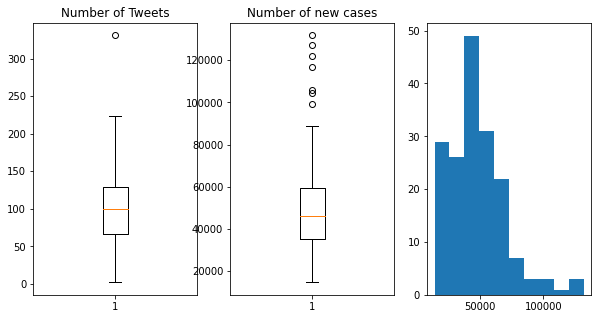

In [95]:
casesMerged = Tweets_news.set_index('Date').groupby(level=0).agg({'Count': np.sum,'compound':['mean']})
test = casesMerged.columns=['_'.join(col) for col in casesMerged.columns.values]
casesMergedFinal = pd.DataFrame(casesMerged).reset_index

casesMerged = pd.merge(casesMerged,CovidCases,how = 'right', on = 'Date')
casesMerged = casesMerged.dropna()
casesMerged = casesMerged.rename(columns={'Count_sum':'Num_tweets','compound_mean':'Sent_score'})

print(casesMerged)
fig, ax = plt.subplots(1,3, figsize = (10,5))
ax[0].boxplot(casesMerged['Num_tweets'])
ax[0].set_title('Number of Tweets')
ax[1].boxplot(casesMerged[' New_cases'])
ax[1].set_title('Number of new cases')
ax[2].hist(casesMerged[' New_cases'])

sorted(stats.zscore(casesMerged[' New_cases']))


When theres a lag the R-squared score is higher in the Test set but not so much the training set. May have to later check if I should run a logistic model.

# Modeling how the the stock changes depending on tweet data (News Sites)

In [123]:
SolarStocks = pd.read_csv('/Users/calebdimenstein/Desktop/Company Stocks/Solar - All Companies.csv')

def g(row):
    if row['average'] < 0:
        val = 0
    else:
        val = 1
    return val

DateAgg = Tweets_news.set_index('Date').groupby(level=0).agg({'Count': np.sum,'compound':['mean'],'likes':['sum'],'retweets':['sum']})
DateAgg = DateAgg.reset_index()

#Merging the dataframes
DateAggAuto = pd.merge(DateCount[['Date','Count_sum','compound_mean','likes_sum','retweets_sum']],AutomobileStock,how = 'right', on = 'Date')
DateAggAuto = DateAggAuto.dropna()
DateAggAuto = DateAggAuto.rename(columns={'Count_sum':'count','compound_mean':'mean_sent'})

DateAggElec = pd.merge(DateCount[['Date','Count_sum','compound_mean','likes_sum','retweets_sum']],ElectronicStocks,how = 'right', on = 'Date')
DateAggElec = DateAggElec.dropna()
DateAggElec = DateAggElec.rename(columns={'Count_sum':'count','compound_mean':'mean_sent'})

DateAggSolar = pd.merge(DateCount[['Date','Count_sum','compound_mean','likes_sum','retweets_sum']],SolarStocks,how = 'right', on = 'Date')
DateAggSolar = DateAggSolar.dropna()
DateAggSolar = DateAggSolar.rename(columns={'Count_sum':'count','compound_mean':'mean_sent'})

#fig = plt.figure()
#plt.boxplot(DateAgg[;])
dfArr = [DateAggAuto, DateAggElec, DateAggSolar]
dfType = ['Automobile','Electric','Solar']
for df,industry in zip(dfArr,dfType):
    if industry == 'Solar':
        for index,row in df.iterrows():
            if index + 1 < 241:
                df.loc[index,'average'] = df.loc[index + 1, 'average']
    else:
        for index,row in df.iterrows():
            if index + 1 <= 248:
                df.loc[index,'average'] = df.loc[index + 1, 'average']

    df['pos_neg'] = df.apply(g,axis = 1)
    print(industry, ' Linear models')
    y = df.iloc[:,-1]
    X = df[['count','mean_sent','likes_sum', 'retweets_sum']]
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
    svm = SVC(kernel = 'rbf', C = 100).fit(X_train,y_train)
    print("SVC score of test data with a degree of 5 is ", svm.score(X_test,y_test))
    print("SVC score of training data with a degree of 5 is ", svm.score(X_train,y_train))


    '''
    print("")
    print(industry, ' Logistic models')
    clf = LogisticRegression(C = 100, max_iter = 50).fit(X_train,y_train)
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    print(clf.coef_)
    
    
    y_proba_lr = clf.fit(X_train,y_train).predict(X_test)
    
    fpr,tpr,_ = roc_curve(y_test,y_proba_lr)
    roc_auc_lr = auc(fpr, tpr)
    print("Roc Auc Score: ",roc_auc_lr)
    '''
    print("")
    print("")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Automobile  Linear models
SVC score of test data with a degree of 5 is  0.2903225806451613
SVC score of training data with a degree of 5 is  0.5777777777777777


Electric  Linear models
SVC score of test data with a degree of 5 is  0.2903225806451613
SVC score of training data with a degree of 5 is  0.5777777777777777


Solar  Linear models
SVC score of test data with a degree of 5 is  0.8
SVC score of training data with a degree of 5 is  0.9166666666666666




##Modeling how the the stock changes depending on tweet data (With Obama and Biden)

In [39]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
import nltk
import re
import gensim.corpora as corpora
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from wordcloud import WordCloud
from pprint import pprint
nltk.download('stopwords')

stop_words = stopwords.words('english')
removeword = ['https','tco','coronavirus','Covid','pandemic','COVID','virus']
Tweets_news['tweets_cleaned'] = \
Tweets_news['tweets'].map(lambda x: re.sub('[,\.!?]','',x))
pat = r'\b(?:{})\b'.format('|'.join(removeword))

Tweets_news['tweets_cleaned'] = Tweets_news['tweets_cleaned'].str.replace(pat,"")

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(Tweets_news['tweets_cleaned']))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=80) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=80)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
data_words_nostops = remove_stopwords(data_words)


data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


mallet_path = '/Users/calebdimenstein/Desktop/mallet/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=35, id2word=id2word)

pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
print(vis)
'''
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
'''

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:14: DeprecationWarning: invalid escape sequence \.
<>:14: DeprecationWarning: invalid escape sequence \.
<>:14: DeprecationWarning: invalid escape sequence \.
<ipython-input-65-9e013d9b51a6>:14: DeprecationWarning: invalid escape sequence \.
  Tweets_news['tweets'].map(lambda x: re.sub('[,\.!?]','',x))
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/calebdimenstein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(24,
  [('official', 0.11006517016654598),
   ('warn', 0.05865314989138305),
   ('city', 0.055756698044895005),
   ('leave', 0.036567704561911656),
   ('local', 0.02570601013758146),
   ('phase', 0.020999275887038378),
   ('great', 0.020999275887038378),
   ('expose', 0.01955104996379435),
   ('transmission', 0.017378711078928313),
   ('area', 0.0166545981173063)]),
 (31,
  [('show', 0.09331476323119778),
   ('accord', 0.08356545961002786),
   ('early', 0.07103064066852367),
   ('child', 0.05466573816155989),
   ('datum', 0.04979108635097493),
   ('infect', 0.04596100278551532),
   ('release', 0.03377437325905292),
   ('symptom', 0.03307799442896936),
   ('person', 0.02681058495821727),
   ('kid', 0.0201949860724234)]),
 (12,
  [('fight', 0.06945510360706063),
   ('mask', 0.06331542594013814),
   ('public', 0.04911742133537989),
   ('issue', 0.04412893323100537),
   ('stop', 0.043745203376822715),
   ('experience', 0.035303146584804296),
   ('order', 0.02264006139677667),
   ('hand', 

'\ndef compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):\n    coherence_values = []\n    model_list = []\n    for num_topics in range(start, limit, step):\n        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)\n        model_list.append(model)\n        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=\'c_v\')\n        coherence_values.append(coherencemodel.get_coherence())\n\n    return model_list, coherence_values\nmodel_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)\nlimit=40; start=2; step=6;\nx = range(start, limit, step)\nplt.plot(x, coherence_values)\nplt.xlabel("Num Topics")\nplt.ylabel("Coherence score")\nplt.legend(("coherence_values"), loc=\'best\')\nplt.show()\n'